In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Unzip c4_imdb-8k.zip file

from zipfile import ZipFile

with ZipFile("c4_imdb-8k.zip", "r") as zip:
    print("Extracting all the files now...")
    zip.extractall()
    print("Done!")

Extracting all the files now...
Done!


In [7]:
from sklearn.datasets import load_files

# Path to datafolder
PATH_DATA = "c4_imdb-8k"

# Load training data
train_data = load_files(
    os.path.join(PATH_DATA, "train"), encoding="ISO-8859-1", categories=["pos", "neg"]
)

# Load test data
test_data = load_files(
    os.path.join(PATH_DATA, "test"), encoding="ISO-8859-1", categories=["pos", "neg"]
)


In [8]:
# Load data in a dataframe
import pandas as pd

# Training data
df = pd.DataFrame({"text": train_data.data, "label": train_data.target})

# Test data
df_test = pd.DataFrame({"text": test_data.data, "label": test_data.target})

print("Training data: ", df.shape)
print("Test  data:    ", df_test.shape)

Training data:  (8000, 2)
Test  data:     (7952, 2)


In [9]:
# Drop duplicates from training/test data
df.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

print("Training data: ", df.shape)
print("Test  data:    ", df_test.shape)

Training data:  (7986, 2)
Test  data:     (7914, 2)


In [10]:
df.head()

,text,label
0,"A bad rip-off attempt on ""Seven"", complete wit...",0
1,Whatever possessed Guy Ritchie to remake Wertm...,0
2,Return To The 3th Chamber is the comedic seque...,1
3,Raising Victor Vargas: A Review<br /><br />You...,0
4,For months preceding the release of this movie...,0


In [13]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))


In [19]:
df['word_count'].describe()

count    7986.000000
mean      231.678688
std       173.646667
min        10.000000
25%       126.000000
50%       173.000000
75%       282.000000
max      2470.000000
Name: word_count, dtype: float64

(array([3.440e+02, 8.400e+02, 2.316e+03, 1.365e+03, 8.240e+02, 5.350e+02,
        4.140e+02, 3.100e+02, 2.280e+02, 1.890e+02, 1.320e+02, 1.070e+02,
        8.000e+01, 6.800e+01, 5.000e+01, 3.900e+01, 4.300e+01, 2.100e+01,
        1.800e+01, 3.400e+01, 1.700e+01, 3.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  10. ,   59.2,  108.4,  157.6,  206.8,  256. ,  305.2,  354.4,
         403.6,  452.8,  502. ,  551.2,  600.4,  649.6,  698.8,  748. ,
         797.2,  846.4,  895.6,  944.8,  994. , 1043.2, 1092.4, 1141.6,
        1190.8, 1240. , 1289.2, 1338.4, 1387.6, 1436.8, 1486. , 1535.2,
        1584.4, 1633.6, 1682.8, 1732. , 1781.2, 1830.4, 1879.6, 1928.8,
        1978. , 

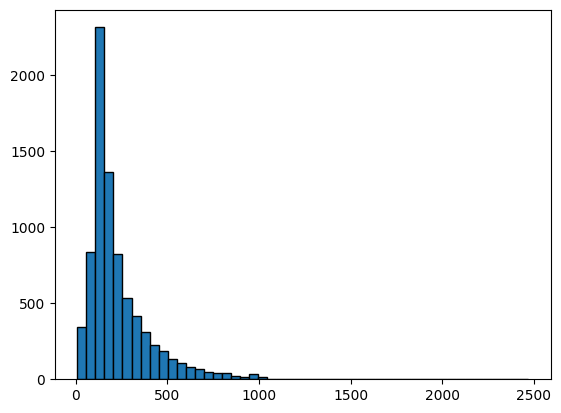

In [15]:
plt.hist(df['word_count'], bins=50, edgecolor='black')